In [1]:
using Plots
using Distributions
using KernelDensity

# generate test sample
dist_true = MvNormal([1.0, 2.0], [2.0 -1.0; -1.0 4.0])
n = 2^10
sample = rand(dist_true, n)

# kernel density estimation
X, Y = sample[1, :], sample[2, :]
k, kx, ky = kde.(((X, Y), X, Y))
ik, ikx, iky = InterpKDE.((k, kx, ky));

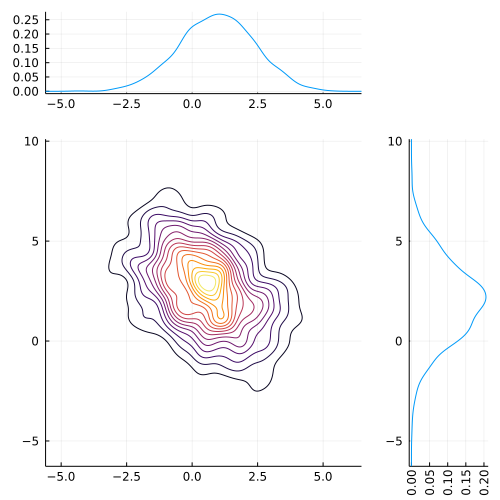

In [2]:
layout = @layout [
    a             _
    b{0.8w, 0.8h} c
]

xlim, ylim = extrema.((k.x, k.y))
legend = colorbar = false
a = plot(kx.x, kx.density; xlim, legend)
c = plot(ky.density, ky.x; ylim, legend, xrotation=90)
b = contour(k.x, k.y, k.density; xlim, ylim, legend)

plot(a, b, c; layout, link=:both, size=(500, 500))

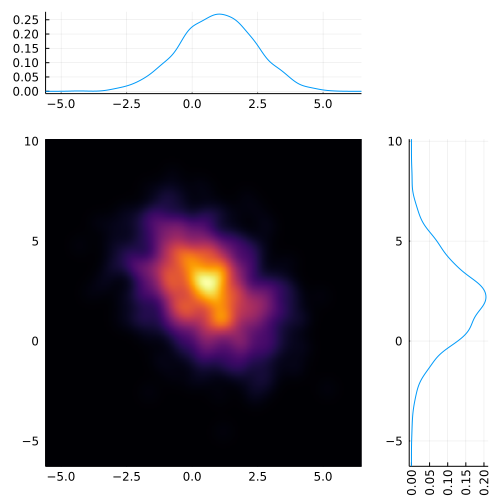

In [3]:
layout = @layout [
    a             _
    b{0.8w, 0.8h} c
]

xlim, ylim = extrema.((k.x, k.y))
legend = colorbar = false
a = plot(kx.x, kx.density; xlim, legend)
c = plot(ky.density, ky.x; ylim, legend, xrotation=90)
b = heatmap(k.x, k.y, k.density; xlim, ylim, legend)

plot(a, b, c; layout, link=:both, size=(500, 500))

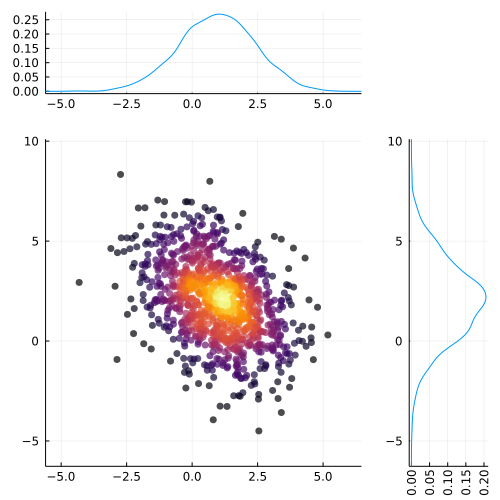

In [4]:
layout = @layout [
    a             _
    b{0.8w, 0.8h} c
]

xlim, ylim = extrema.((k.x, k.y))
legend = colorbar = false
a = plot(kx.x, kx.density; xlim, legend)
c = plot(ky.density, ky.x; ylim, legend, xrotation=90)
b = scatter(X, Y; xlim, ylim, legend, marker_z=pdf.(Ref(ik), X, Y), alpha=0.7, msw=0)

plot(a, b, c; layout, link=:both, size=(500, 500))

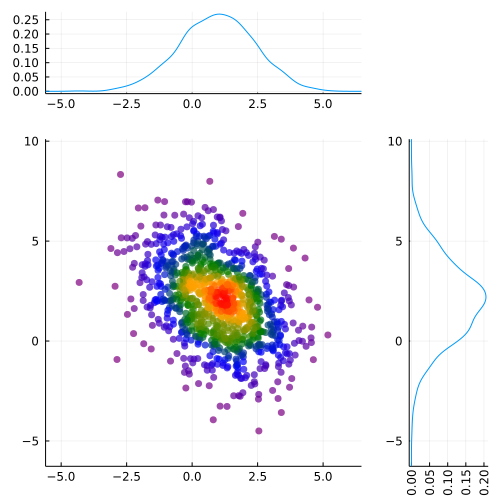

In [5]:
layout = @layout [
    a             _
    b{0.8w, 0.8h} c
]

xlim, ylim = extrema.((k.x, k.y))
legend = colorbar = false
a = plot(kx.x, kx.density; xlim, legend)
c = plot(ky.density, ky.x; ylim, legend, xrotation=90)
b = scatter(X, Y; xlim, ylim, legend, marker_z=pdf.(Ref(ik), X, Y), alpha=0.7, msw=0, color=:rainbow)

plot(a, b, c; layout, link=:both, size=(500, 500))